In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft,fftfreq
data1 = loadmat('data_exp.mat')
data2 = loadmat('data_pred1.mat')
data3 = loadmat('data_pred2.mat')
F1 = data1['F']
F2 = data2['F']
F3 = data3['F']
displacement1 = data1['x'] 
displacement2 = data2['x'] 
displacement3 = data3['x'] 
import pandas as pd
F11 = pd.DataFrame(F1)
displacement11 = pd.DataFrame(displacement1)
#train_data = pd.concat([F11, displacement11], axis=1)
train_data = F1
F21 = pd.DataFrame(F2)
displacement21 = pd.DataFrame(displacement2)
F31 = pd.DataFrame(F3)
displacement31 = pd.DataFrame(displacement3)



test_data = pd.concat([F21, F31], axis = 0)
real_data = pd.concat([displacement21, displacement31], axis = 0)
test_data = np.array(test_data)
real_data = np.array(real_data)
train_features = np.array(train_data, dtype=np.float32)
test_features = np.array(test_data, dtype=np.float32)
train_labels = np.array(
    displacement1, dtype=np.float32)
test_labels = np.array(
    real_data, dtype=np.float32)

In [2]:
X = train_features
Y = train_labels
X_test = test_features
Y_test = test_labels

In [3]:
from sklearn.preprocessing import  MinMaxScaler
scaler_F = MinMaxScaler(feature_range=(-1, 1))
scaler_X = MinMaxScaler(feature_range=(-1, 1))
X = scaler_F.fit_transform(X)
Y = scaler_X.fit_transform(Y)
X_test = scaler_F.transform(X_test)

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y , test_size=0.3, random_state=42)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,LSTM,Activation,GRU,Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from tensorflow.keras.optimizers import SGD
import keras
from keras.layers import TimeDistributed
os.environ["CUDA_VISIBLE_DEVICES"] = '0'
earlyStop = EarlyStopping(monitor='val_loss', min_delta=0, patience=500, verbose=2, mode='auto', restore_best_weights=True)


# 准备训练数据

# 将输入数据转换为合适的形状
x_train = x_train.reshape((-1, 1000, 1))
y_train = y_train.reshape((-1,1000,1))

# 准备测试数据
x_test = x_test.reshape((-1, 1000, 1))
y_test = y_test.reshape((-1,1000,1))

# 创建RNN模型
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,stateful=False, input_shape=(x_train.shape[1], 1),activation='tanh'))  # 第一层LSTM
#model.add(LSTM(units=32,return_sequences=True,stateful=False))  # 第二层LSTM
#model.add(LSTM(units=32,return_sequences=True,stateful=False))  # 第三层LSTM
model.add(Dense(units=100))
model.add(Dense(units=50))
#model.add(Dense(units=32))
model.add(Dense(units=1))

# 编译模型
model.compile(loss='mse', optimizer='adam', metrics = ['mae'])

# 进行预测
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1000, 50)          10400     
_________________________________________________________________
dense (Dense)                (None, 1000, 100)         5100      
_________________________________________________________________
dense_1 (Dense)              (None, 1000, 50)          5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1000, 1)           51        
Total params: 20,601
Trainable params: 20,601
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(x_train,y_train,epochs=2000, validation_data=(x_test, y_test),verbose=1,callbacks = earlyStop)

Epoch 1/2000
3/3 [==============================] - 3s 285ms/step - loss: 0.2494 - mae: 0.4191 - val_loss: 0.2109 - val_mae: 0.3749
Epoch 2/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.2145 - mae: 0.3751 - val_loss: 0.2131 - val_mae: 0.3600
Epoch 3/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.2183 - mae: 0.3689 - val_loss: 0.2015 - val_mae: 0.3533
Epoch 4/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.1994 - mae: 0.3586 - val_loss: 0.1884 - val_mae: 0.3516
Epoch 5/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.1915 - mae: 0.3587 - val_loss: 0.1890 - val_mae: 0.3555
Epoch 6/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.1894 - mae: 0.3575 - val_loss: 0.1854 - val_mae: 0.3494
Epoch 7/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.1859 - mae: 0.3507 - val_loss: 0.1808 - val_mae: 0.3402
Epoch 8/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.1804 -

Epoch 63/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.1053 - mae: 0.2529 - val_loss: 0.1116 - val_mae: 0.2531
Epoch 64/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.1048 - mae: 0.2510 - val_loss: 0.0962 - val_mae: 0.2417
Epoch 65/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.0978 - mae: 0.2461 - val_loss: 0.0975 - val_mae: 0.2411
Epoch 66/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.1008 - mae: 0.2458 - val_loss: 0.0982 - val_mae: 0.2404
Epoch 67/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0977 - mae: 0.2422 - val_loss: 0.0917 - val_mae: 0.2334
Epoch 68/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0916 - mae: 0.2369 - val_loss: 0.0891 - val_mae: 0.2323
Epoch 69/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0898 - mae: 0.2355 - val_loss: 0.0879 - val_mae: 0.2300
Epoch 70/2000
3/3 [==============================] - 0s 94ms/step - loss: 

3/3 [==============================] - 0s 92ms/step - loss: 0.0807 - mae: 0.2217 - val_loss: 0.0762 - val_mae: 0.2133
Epoch 125/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.0730 - mae: 0.2096 - val_loss: 0.0711 - val_mae: 0.2065
Epoch 126/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0684 - mae: 0.2025 - val_loss: 0.0710 - val_mae: 0.2088
Epoch 127/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0704 - mae: 0.2079 - val_loss: 0.0695 - val_mae: 0.2038
Epoch 128/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0712 - mae: 0.2067 - val_loss: 0.0685 - val_mae: 0.2027
Epoch 129/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0685 - mae: 0.2039 - val_loss: 0.0718 - val_mae: 0.2083
Epoch 130/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0669 - mae: 0.2007 - val_loss: 0.0657 - val_mae: 0.1978
Epoch 131/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.063

3/3 [==============================] - 0s 103ms/step - loss: 0.0598 - mae: 0.1885 - val_loss: 0.0622 - val_mae: 0.1913
Epoch 186/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0594 - mae: 0.1879 - val_loss: 0.0610 - val_mae: 0.1903
Epoch 187/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0604 - mae: 0.1894 - val_loss: 0.0591 - val_mae: 0.1869
Epoch 188/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0602 - mae: 0.1898 - val_loss: 0.0585 - val_mae: 0.1861
Epoch 189/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0577 - mae: 0.1848 - val_loss: 0.0583 - val_mae: 0.1856
Epoch 190/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0579 - mae: 0.1854 - val_loss: 0.0587 - val_mae: 0.1862
Epoch 191/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0574 - mae: 0.1846 - val_loss: 0.0585 - val_mae: 0.1864
Epoch 192/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.0601 

3/3 [==============================] - 0s 100ms/step - loss: 0.0537 - mae: 0.1793 - val_loss: 0.0553 - val_mae: 0.1816
Epoch 247/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0539 - mae: 0.1795 - val_loss: 0.0546 - val_mae: 0.1810
Epoch 248/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0543 - mae: 0.1809 - val_loss: 0.0542 - val_mae: 0.1797
Epoch 249/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0550 - mae: 0.1813 - val_loss: 0.0571 - val_mae: 0.1852
Epoch 250/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0561 - mae: 0.1837 - val_loss: 0.0585 - val_mae: 0.1873
Epoch 251/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0572 - mae: 0.1857 - val_loss: 0.0562 - val_mae: 0.1838
Epoch 252/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0553 - mae: 0.1821 - val_loss: 0.0580 - val_mae: 0.1860
Epoch 253/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0562

3/3 [==============================] - 0s 93ms/step - loss: 0.0507 - mae: 0.1746 - val_loss: 0.0506 - val_mae: 0.1739
Epoch 308/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0507 - mae: 0.1743 - val_loss: 0.0523 - val_mae: 0.1774
Epoch 309/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0518 - mae: 0.1765 - val_loss: 0.0502 - val_mae: 0.1734
Epoch 310/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0507 - mae: 0.1741 - val_loss: 0.0524 - val_mae: 0.1774
Epoch 311/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0527 - mae: 0.1780 - val_loss: 0.0518 - val_mae: 0.1765
Epoch 312/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0533 - mae: 0.1794 - val_loss: 0.0524 - val_mae: 0.1770
Epoch 313/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0512 - mae: 0.1750 - val_loss: 0.0511 - val_mae: 0.1756
Epoch 314/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0507

3/3 [==============================] - 0s 99ms/step - loss: 0.0493 - mae: 0.1719 - val_loss: 0.0494 - val_mae: 0.1715
Epoch 369/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0496 - mae: 0.1718 - val_loss: 0.0500 - val_mae: 0.1736
Epoch 370/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0497 - mae: 0.1726 - val_loss: 0.0496 - val_mae: 0.1720
Epoch 371/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0495 - mae: 0.1719 - val_loss: 0.0497 - val_mae: 0.1730
Epoch 372/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0496 - mae: 0.1723 - val_loss: 0.0491 - val_mae: 0.1712
Epoch 373/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0492 - mae: 0.1713 - val_loss: 0.0495 - val_mae: 0.1726
Epoch 374/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0497 - mae: 0.1726 - val_loss: 0.0499 - val_mae: 0.1724
Epoch 375/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0494

3/3 [==============================] - 0s 91ms/step - loss: 0.0481 - mae: 0.1695 - val_loss: 0.0480 - val_mae: 0.1696
Epoch 430/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0481 - mae: 0.1693 - val_loss: 0.0481 - val_mae: 0.1689
Epoch 431/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0478 - mae: 0.1686 - val_loss: 0.0473 - val_mae: 0.1687
Epoch 432/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0477 - mae: 0.1693 - val_loss: 0.0473 - val_mae: 0.1676
Epoch 433/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0476 - mae: 0.1680 - val_loss: 0.0479 - val_mae: 0.1701
Epoch 434/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0479 - mae: 0.1697 - val_loss: 0.0477 - val_mae: 0.1684
Epoch 435/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0476 - mae: 0.1683 - val_loss: 0.0475 - val_mae: 0.1685
Epoch 436/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0474 - 

3/3 [==============================] - 0s 90ms/step - loss: 0.0471 - mae: 0.1672 - val_loss: 0.0473 - val_mae: 0.1684
Epoch 491/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0472 - mae: 0.1679 - val_loss: 0.0462 - val_mae: 0.1654
Epoch 492/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0467 - mae: 0.1664 - val_loss: 0.0482 - val_mae: 0.1696
Epoch 493/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0473 - mae: 0.1678 - val_loss: 0.0462 - val_mae: 0.1657
Epoch 494/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0474 - mae: 0.1678 - val_loss: 0.0476 - val_mae: 0.1683
Epoch 495/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0472 - mae: 0.1678 - val_loss: 0.0461 - val_mae: 0.1656
Epoch 496/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0471 - mae: 0.1670 - val_loss: 0.0503 - val_mae: 0.1736
Epoch 497/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0505

3/3 [==============================] - 0s 90ms/step - loss: 0.0471 - mae: 0.1669 - val_loss: 0.0468 - val_mae: 0.1675
Epoch 552/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0468 - mae: 0.1670 - val_loss: 0.0463 - val_mae: 0.1647
Epoch 553/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0462 - mae: 0.1653 - val_loss: 0.0458 - val_mae: 0.1655
Epoch 554/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0457 - mae: 0.1645 - val_loss: 0.0457 - val_mae: 0.1641
Epoch 555/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0456 - mae: 0.1646 - val_loss: 0.0462 - val_mae: 0.1658
Epoch 556/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.0457 - mae: 0.1647 - val_loss: 0.0457 - val_mae: 0.1643
Epoch 557/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0459 - mae: 0.1651 - val_loss: 0.0460 - val_mae: 0.1651
Epoch 558/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.045

3/3 [==============================] - 0s 92ms/step - loss: 0.0462 - mae: 0.1655 - val_loss: 0.0469 - val_mae: 0.1669
Epoch 613/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0466 - mae: 0.1662 - val_loss: 0.0451 - val_mae: 0.1635
Epoch 614/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0458 - mae: 0.1653 - val_loss: 0.0488 - val_mae: 0.1694
Epoch 615/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.0476 - mae: 0.1678 - val_loss: 0.0467 - val_mae: 0.1677
Epoch 616/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0480 - mae: 0.1696 - val_loss: 0.0501 - val_mae: 0.1718
Epoch 617/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0491 - mae: 0.1705 - val_loss: 0.0482 - val_mae: 0.1697
Epoch 618/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0474 - mae: 0.1682 - val_loss: 0.0478 - val_mae: 0.1679
Epoch 619/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.047

3/3 [==============================] - 0s 99ms/step - loss: 0.0438 - mae: 0.1614 - val_loss: 0.0470 - val_mae: 0.1668
Epoch 674/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0458 - mae: 0.1652 - val_loss: 0.0442 - val_mae: 0.1613
Epoch 675/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0463 - mae: 0.1666 - val_loss: 0.0472 - val_mae: 0.1675
Epoch 676/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0471 - mae: 0.1672 - val_loss: 0.0467 - val_mae: 0.1660
Epoch 677/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0458 - mae: 0.1653 - val_loss: 0.0467 - val_mae: 0.1649
Epoch 678/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0457 - mae: 0.1646 - val_loss: 0.0453 - val_mae: 0.1637
Epoch 679/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0463 - mae: 0.1656 - val_loss: 0.0493 - val_mae: 0.1715
Epoch 680/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0499 

3/3 [==============================] - 0s 98ms/step - loss: 0.0412 - mae: 0.1570 - val_loss: 0.0416 - val_mae: 0.1576
Epoch 735/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0411 - mae: 0.1569 - val_loss: 0.0433 - val_mae: 0.1604
Epoch 736/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0421 - mae: 0.1587 - val_loss: 0.0422 - val_mae: 0.1579
Epoch 737/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0417 - mae: 0.1581 - val_loss: 0.0413 - val_mae: 0.1561
Epoch 738/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0411 - mae: 0.1566 - val_loss: 0.0415 - val_mae: 0.1575
Epoch 739/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0410 - mae: 0.1568 - val_loss: 0.0422 - val_mae: 0.1581
Epoch 740/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0415 - mae: 0.1574 - val_loss: 0.0417 - val_mae: 0.1574
Epoch 741/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0414 

3/3 [==============================] - 0s 91ms/step - loss: 0.0400 - mae: 0.1549 - val_loss: 0.0398 - val_mae: 0.1541
Epoch 796/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0400 - mae: 0.1550 - val_loss: 0.0417 - val_mae: 0.1580
Epoch 797/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0408 - mae: 0.1565 - val_loss: 0.0402 - val_mae: 0.1547
Epoch 798/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0398 - mae: 0.1545 - val_loss: 0.0403 - val_mae: 0.1555
Epoch 799/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0399 - mae: 0.1552 - val_loss: 0.0406 - val_mae: 0.1546
Epoch 800/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0400 - mae: 0.1548 - val_loss: 0.0402 - val_mae: 0.1556
Epoch 801/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0397 - mae: 0.1548 - val_loss: 0.0403 - val_mae: 0.1546
Epoch 802/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0398

3/3 [==============================] - 0s 90ms/step - loss: 0.0390 - mae: 0.1534 - val_loss: 0.0394 - val_mae: 0.1536
Epoch 857/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0390 - mae: 0.1534 - val_loss: 0.0397 - val_mae: 0.1539
Epoch 858/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0391 - mae: 0.1532 - val_loss: 0.0394 - val_mae: 0.1540
Epoch 859/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0395 - mae: 0.1551 - val_loss: 0.0405 - val_mae: 0.1541
Epoch 860/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.0392 - mae: 0.1533 - val_loss: 0.0394 - val_mae: 0.1537
Epoch 861/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0387 - mae: 0.1527 - val_loss: 0.0391 - val_mae: 0.1526
Epoch 862/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0392 - mae: 0.1537 - val_loss: 0.0392 - val_mae: 0.1529
Epoch 863/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0388 -

3/3 [==============================] - 0s 98ms/step - loss: 0.0381 - mae: 0.1515 - val_loss: 0.0384 - val_mae: 0.1506
Epoch 918/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0378 - mae: 0.1505 - val_loss: 0.0384 - val_mae: 0.1515
Epoch 919/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.0379 - mae: 0.1513 - val_loss: 0.0384 - val_mae: 0.1509
Epoch 920/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0380 - mae: 0.1511 - val_loss: 0.0391 - val_mae: 0.1529
Epoch 921/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0382 - mae: 0.1518 - val_loss: 0.0387 - val_mae: 0.1512
Epoch 922/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0379 - mae: 0.1508 - val_loss: 0.0386 - val_mae: 0.1523
Epoch 923/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0378 - mae: 0.1514 - val_loss: 0.0393 - val_mae: 0.1520
Epoch 924/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0381 

3/3 [==============================] - 0s 91ms/step - loss: 0.0394 - mae: 0.1533 - val_loss: 0.0402 - val_mae: 0.1546
Epoch 979/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0395 - mae: 0.1539 - val_loss: 0.0424 - val_mae: 0.1574
Epoch 980/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0403 - mae: 0.1553 - val_loss: 0.0429 - val_mae: 0.1586
Epoch 981/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0399 - mae: 0.1545 - val_loss: 0.0400 - val_mae: 0.1540
Epoch 982/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0390 - mae: 0.1530 - val_loss: 0.0395 - val_mae: 0.1528
Epoch 983/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0385 - mae: 0.1518 - val_loss: 0.0392 - val_mae: 0.1524
Epoch 984/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.0387 - mae: 0.1526 - val_loss: 0.0395 - val_mae: 0.1524
Epoch 985/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0380 

3/3 [==============================] - 0s 101ms/step - loss: 0.0364 - mae: 0.1481 - val_loss: 0.0378 - val_mae: 0.1495
Epoch 1040/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0368 - mae: 0.1486 - val_loss: 0.0376 - val_mae: 0.1492
Epoch 1041/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0366 - mae: 0.1483 - val_loss: 0.0379 - val_mae: 0.1492
Epoch 1042/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0369 - mae: 0.1490 - val_loss: 0.0385 - val_mae: 0.1496
Epoch 1043/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.0367 - mae: 0.1481 - val_loss: 0.0375 - val_mae: 0.1489
Epoch 1044/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0368 - mae: 0.1484 - val_loss: 0.0379 - val_mae: 0.1503
Epoch 1045/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0366 - mae: 0.1483 - val_loss: 0.0375 - val_mae: 0.1487
Epoch 1046/2000
3/3 [==============================] - 0s 107ms/step - l

3/3 [==============================] - 0s 97ms/step - loss: 0.0377 - mae: 0.1504 - val_loss: 0.0393 - val_mae: 0.1515
Epoch 1101/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0376 - mae: 0.1495 - val_loss: 0.0388 - val_mae: 0.1516
Epoch 1102/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0367 - mae: 0.1485 - val_loss: 0.0394 - val_mae: 0.1526
Epoch 1103/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.0369 - mae: 0.1493 - val_loss: 0.0380 - val_mae: 0.1496
Epoch 1104/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0361 - mae: 0.1473 - val_loss: 0.0376 - val_mae: 0.1486
Epoch 1105/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0362 - mae: 0.1469 - val_loss: 0.0380 - val_mae: 0.1495
Epoch 1106/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0364 - mae: 0.1475 - val_loss: 0.0378 - val_mae: 0.1497
Epoch 1107/2000
3/3 [==============================] - 0s 94ms/step - loss: 

3/3 [==============================] - 0s 99ms/step - loss: 0.0412 - mae: 0.1564 - val_loss: 0.0436 - val_mae: 0.1620
Epoch 1162/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0411 - mae: 0.1573 - val_loss: 0.0433 - val_mae: 0.1606
Epoch 1163/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0442 - mae: 0.1632 - val_loss: 0.0544 - val_mae: 0.1780
Epoch 1164/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0465 - mae: 0.1667 - val_loss: 0.0502 - val_mae: 0.1718
Epoch 1165/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0415 - mae: 0.1566 - val_loss: 0.0420 - val_mae: 0.1590
Epoch 1166/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0399 - mae: 0.1553 - val_loss: 0.0475 - val_mae: 0.1640
Epoch 1167/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0405 - mae: 0.1561 - val_loss: 0.0414 - val_mae: 0.1564
Epoch 1168/2000
3/3 [==============================] - 0s 93ms/step - loss: 

3/3 [==============================] - 0s 116ms/step - loss: 0.0343 - mae: 0.1436 - val_loss: 0.0366 - val_mae: 0.1472
Epoch 1223/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0344 - mae: 0.1436 - val_loss: 0.0361 - val_mae: 0.1459
Epoch 1224/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0340 - mae: 0.1433 - val_loss: 0.0366 - val_mae: 0.1457
Epoch 1225/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0340 - mae: 0.1427 - val_loss: 0.0362 - val_mae: 0.1461
Epoch 1226/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0342 - mae: 0.1433 - val_loss: 0.0365 - val_mae: 0.1472
Epoch 1227/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0344 - mae: 0.1440 - val_loss: 0.0366 - val_mae: 0.1464
Epoch 1228/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0347 - mae: 0.1446 - val_loss: 0.0370 - val_mae: 0.1465
Epoch 1229/2000
3/3 [==============================] - 0s 95ms/step - loss: 

3/3 [==============================] - 0s 100ms/step - loss: 0.0355 - mae: 0.1459 - val_loss: 0.0379 - val_mae: 0.1492
Epoch 1284/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.0355 - mae: 0.1462 - val_loss: 0.0370 - val_mae: 0.1476
Epoch 1285/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0354 - mae: 0.1456 - val_loss: 0.0370 - val_mae: 0.1478
Epoch 1286/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0352 - mae: 0.1454 - val_loss: 0.0374 - val_mae: 0.1482
Epoch 1287/2000
3/3 [==============================] - 0s 88ms/step - loss: 0.0354 - mae: 0.1463 - val_loss: 0.0377 - val_mae: 0.1492
Epoch 1288/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0348 - mae: 0.1451 - val_loss: 0.0364 - val_mae: 0.1464
Epoch 1289/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0351 - mae: 0.1445 - val_loss: 0.0370 - val_mae: 0.1493
Epoch 1290/2000
3/3 [==============================] - 0s 99ms/step - los

3/3 [==============================] - 0s 96ms/step - loss: 0.0345 - mae: 0.1438 - val_loss: 0.0391 - val_mae: 0.1524
Epoch 1345/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0367 - mae: 0.1484 - val_loss: 0.0374 - val_mae: 0.1485
Epoch 1346/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0358 - mae: 0.1474 - val_loss: 0.0394 - val_mae: 0.1508
Epoch 1347/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0355 - mae: 0.1461 - val_loss: 0.0366 - val_mae: 0.1462
Epoch 1348/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0345 - mae: 0.1436 - val_loss: 0.0381 - val_mae: 0.1499
Epoch 1349/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0352 - mae: 0.1455 - val_loss: 0.0375 - val_mae: 0.1489
Epoch 1350/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0345 - mae: 0.1445 - val_loss: 0.0399 - val_mae: 0.1514
Epoch 1351/2000
3/3 [==============================] - 0s 98ms/step - loss: 

3/3 [==============================] - 0s 90ms/step - loss: 0.0325 - mae: 0.1402 - val_loss: 0.0351 - val_mae: 0.1440
Epoch 1406/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0323 - mae: 0.1400 - val_loss: 0.0354 - val_mae: 0.1449
Epoch 1407/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0322 - mae: 0.1401 - val_loss: 0.0351 - val_mae: 0.1428
Epoch 1408/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0322 - mae: 0.1398 - val_loss: 0.0353 - val_mae: 0.1437
Epoch 1409/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0323 - mae: 0.1395 - val_loss: 0.0359 - val_mae: 0.1456
Epoch 1410/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0323 - mae: 0.1400 - val_loss: 0.0349 - val_mae: 0.1431
Epoch 1411/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.0325 - mae: 0.1408 - val_loss: 0.0362 - val_mae: 0.1454
Epoch 1412/2000
3/3 [==============================] - 0s 97ms/step - loss:

3/3 [==============================] - 0s 92ms/step - loss: 0.0689 - mae: 0.2004 - val_loss: 0.0666 - val_mae: 0.1968
Epoch 1467/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0664 - mae: 0.1975 - val_loss: 0.0679 - val_mae: 0.2027
Epoch 1468/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0663 - mae: 0.2008 - val_loss: 0.0655 - val_mae: 0.1984
Epoch 1469/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.0633 - mae: 0.1972 - val_loss: 0.0613 - val_mae: 0.1941
Epoch 1470/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0575 - mae: 0.1879 - val_loss: 0.0544 - val_mae: 0.1789
Epoch 1471/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0478 - mae: 0.1713 - val_loss: 0.0532 - val_mae: 0.1745
Epoch 1472/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0433 - mae: 0.1612 - val_loss: 0.0468 - val_mae: 0.1673
Epoch 1473/2000
3/3 [==============================] - 0s 106ms/step - loss: 

3/3 [==============================] - 0s 100ms/step - loss: 0.0339 - mae: 0.1435 - val_loss: 0.0373 - val_mae: 0.1474
Epoch 1528/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0334 - mae: 0.1430 - val_loss: 0.0363 - val_mae: 0.1441
Epoch 1529/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0337 - mae: 0.1424 - val_loss: 0.0380 - val_mae: 0.1505
Epoch 1530/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.0341 - mae: 0.1438 - val_loss: 0.0358 - val_mae: 0.1439
Epoch 1531/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.0338 - mae: 0.1431 - val_loss: 0.0363 - val_mae: 0.1455
Epoch 1532/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.0337 - mae: 0.1429 - val_loss: 0.0391 - val_mae: 0.1513
Epoch 1533/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.0339 - mae: 0.1432 - val_loss: 0.0363 - val_mae: 0.1443
Epoch 1534/2000
3/3 [==============================] - 0s 109ms/step - loss:

3/3 [==============================] - 0s 97ms/step - loss: 0.0305 - mae: 0.1365 - val_loss: 0.0344 - val_mae: 0.1413
Epoch 1589/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.0305 - mae: 0.1365 - val_loss: 0.0348 - val_mae: 0.1419
Epoch 1590/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0305 - mae: 0.1363 - val_loss: 0.0340 - val_mae: 0.1405
Epoch 1591/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.0304 - mae: 0.1362 - val_loss: 0.0346 - val_mae: 0.1423
Epoch 1592/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0306 - mae: 0.1364 - val_loss: 0.0349 - val_mae: 0.1423
Epoch 1593/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0306 - mae: 0.1369 - val_loss: 0.0344 - val_mae: 0.1406
Epoch 1594/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0304 - mae: 0.1360 - val_loss: 0.0346 - val_mae: 0.1422
Epoch 1595/2000
3/3 [==============================] - 0s 98ms/step - los

3/3 [==============================] - 0s 105ms/step - loss: 0.0297 - mae: 0.1346 - val_loss: 0.0346 - val_mae: 0.1409
Epoch 1650/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0302 - mae: 0.1356 - val_loss: 0.0344 - val_mae: 0.1412
Epoch 1651/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0298 - mae: 0.1351 - val_loss: 0.0349 - val_mae: 0.1427
Epoch 1652/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0304 - mae: 0.1363 - val_loss: 0.0341 - val_mae: 0.1407
Epoch 1653/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0299 - mae: 0.1351 - val_loss: 0.0347 - val_mae: 0.1430
Epoch 1654/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0305 - mae: 0.1369 - val_loss: 0.0337 - val_mae: 0.1394
Epoch 1655/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0301 - mae: 0.1359 - val_loss: 0.0348 - val_mae: 0.1418
Epoch 1656/2000
3/3 [==============================] - 0s 89ms/step - loss: 

3/3 [==============================] - 0s 97ms/step - loss: 0.0469 - mae: 0.1686 - val_loss: 0.0510 - val_mae: 0.1768
Epoch 1711/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0485 - mae: 0.1714 - val_loss: 0.0475 - val_mae: 0.1676
Epoch 1712/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0472 - mae: 0.1700 - val_loss: 0.0454 - val_mae: 0.1657
Epoch 1713/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0435 - mae: 0.1629 - val_loss: 0.0479 - val_mae: 0.1703
Epoch 1714/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0444 - mae: 0.1646 - val_loss: 0.0467 - val_mae: 0.1671
Epoch 1715/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.0412 - mae: 0.1585 - val_loss: 0.0505 - val_mae: 0.1733
Epoch 1716/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0397 - mae: 0.1553 - val_loss: 0.0395 - val_mae: 0.1536
Epoch 1717/2000
3/3 [==============================] - 0s 104ms/step - loss

3/3 [==============================] - 0s 111ms/step - loss: 0.0285 - mae: 0.1320 - val_loss: 0.0322 - val_mae: 0.1370
Epoch 1772/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0284 - mae: 0.1322 - val_loss: 0.0322 - val_mae: 0.1370
Epoch 1773/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0285 - mae: 0.1320 - val_loss: 0.0329 - val_mae: 0.1388
Epoch 1774/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0285 - mae: 0.1324 - val_loss: 0.0323 - val_mae: 0.1376
Epoch 1775/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0285 - mae: 0.1321 - val_loss: 0.0325 - val_mae: 0.1386
Epoch 1776/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0286 - mae: 0.1321 - val_loss: 0.0325 - val_mae: 0.1384
Epoch 1777/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0288 - mae: 0.1331 - val_loss: 0.0329 - val_mae: 0.1385
Epoch 1778/2000
3/3 [==============================] - 0s 89ms/step - loss: 

3/3 [==============================] - 0s 90ms/step - loss: 0.0287 - mae: 0.1327 - val_loss: 0.0320 - val_mae: 0.1363
Epoch 1833/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0287 - mae: 0.1325 - val_loss: 0.0334 - val_mae: 0.1396
Epoch 1834/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0289 - mae: 0.1328 - val_loss: 0.0316 - val_mae: 0.1369
Epoch 1835/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.0287 - mae: 0.1333 - val_loss: 0.0330 - val_mae: 0.1392
Epoch 1836/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0286 - mae: 0.1324 - val_loss: 0.0321 - val_mae: 0.1381
Epoch 1837/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0283 - mae: 0.1320 - val_loss: 0.0329 - val_mae: 0.1385
Epoch 1838/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0287 - mae: 0.1330 - val_loss: 0.0321 - val_mae: 0.1369
Epoch 1839/2000
3/3 [==============================] - 0s 98ms/step - loss: 

3/3 [==============================] - 0s 92ms/step - loss: 0.0329 - mae: 0.1422 - val_loss: 0.0348 - val_mae: 0.1447
Epoch 1894/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0317 - mae: 0.1392 - val_loss: 0.0341 - val_mae: 0.1435
Epoch 1895/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.0311 - mae: 0.1389 - val_loss: 0.0335 - val_mae: 0.1407
Epoch 1896/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0306 - mae: 0.1365 - val_loss: 0.0327 - val_mae: 0.1402
Epoch 1897/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.0304 - mae: 0.1363 - val_loss: 0.0331 - val_mae: 0.1401
Epoch 1898/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0298 - mae: 0.1349 - val_loss: 0.0328 - val_mae: 0.1406
Epoch 1899/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0294 - mae: 0.1349 - val_loss: 0.0319 - val_mae: 0.1373
Epoch 1900/2000
3/3 [==============================] - 0s 99ms/step - los

3/3 [==============================] - 0s 100ms/step - loss: 0.0268 - mae: 0.1287 - val_loss: 0.0303 - val_mae: 0.1338
Epoch 1955/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0267 - mae: 0.1287 - val_loss: 0.0303 - val_mae: 0.1337
Epoch 1956/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0265 - mae: 0.1280 - val_loss: 0.0302 - val_mae: 0.1333
Epoch 1957/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.0266 - mae: 0.1282 - val_loss: 0.0302 - val_mae: 0.1338
Epoch 1958/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0266 - mae: 0.1282 - val_loss: 0.0297 - val_mae: 0.1326
Epoch 1959/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0265 - mae: 0.1279 - val_loss: 0.0299 - val_mae: 0.1334
Epoch 1960/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0264 - mae: 0.1279 - val_loss: 0.0298 - val_mae: 0.1329
Epoch 1961/2000
3/3 [==============================] - 0s 91ms/step - loss: 

In [7]:
X_test = X_test.reshape(-1,1000,1)

In [8]:
y_pred = model.predict(X_test)

In [9]:
#y_pred = scaler.inverse_transform(y_pred)
#y_real = scaler.inverse_transform(test_labels)

In [10]:

y_pred = y_pred.reshape(-1,1000)
y_real = test_labels
y_pred = scaler_X.inverse_transform(y_pred)

In [24]:
y_pred1 = model.predict(x_test)
y_pred1 = y_pred1.reshape(-1,1000)
y_real1 = y_test.reshape(-1,1000)
y_real1 = scaler_X.inverse_transform(y_real1)
y_pred1 = scaler_X.inverse_transform(y_pred1)

In [23]:
y_pred1.shape

(10, 1000)

In [27]:
for i in range(36):
    y_pred1[i][1]=0

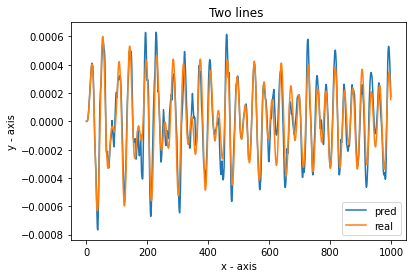

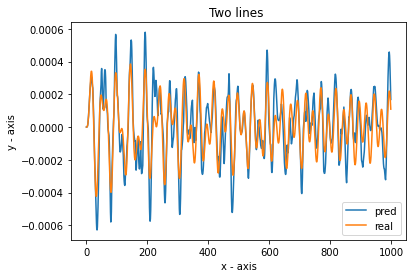

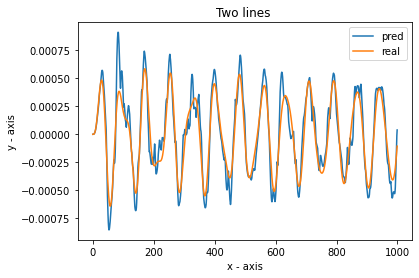

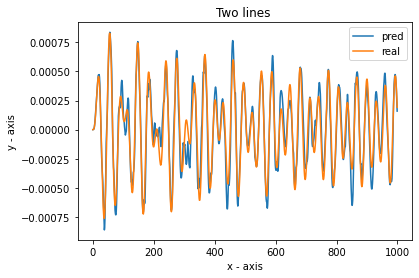

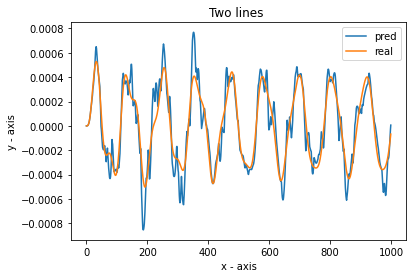

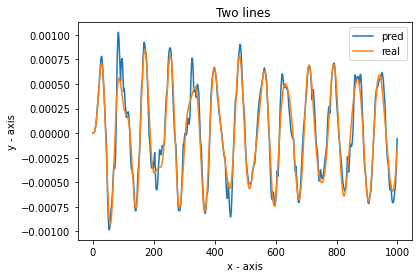

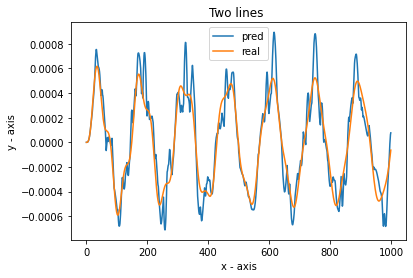

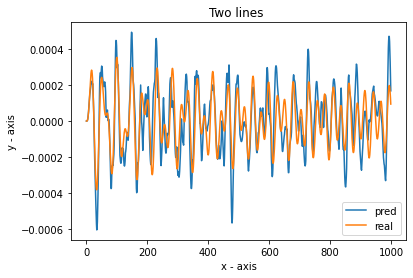

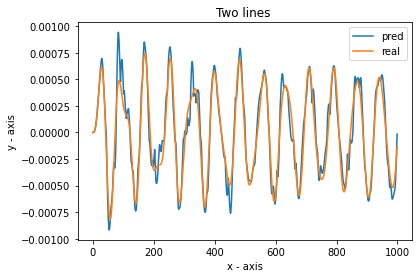

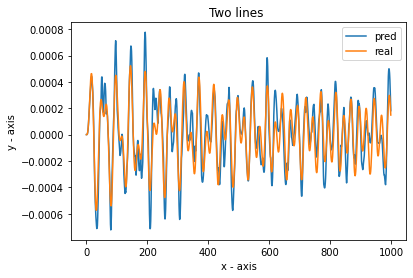

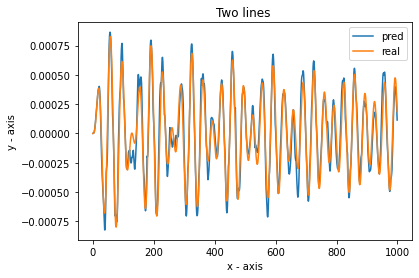

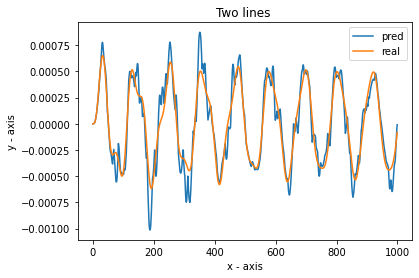

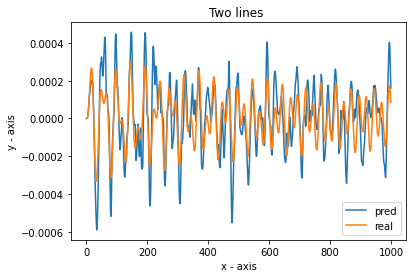

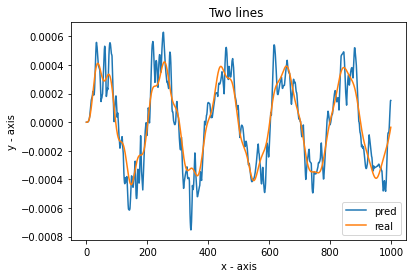

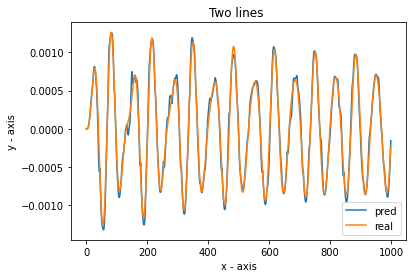

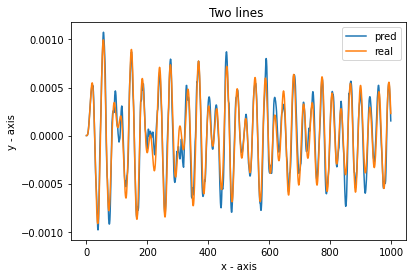

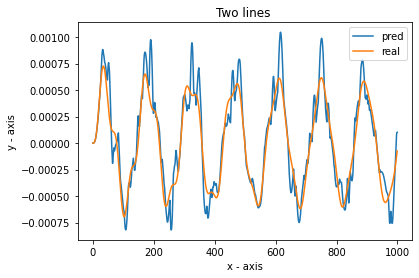

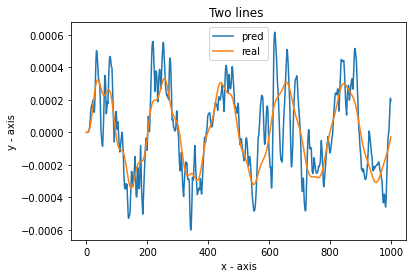

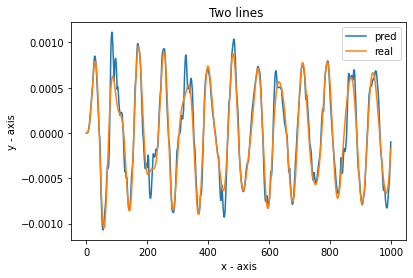

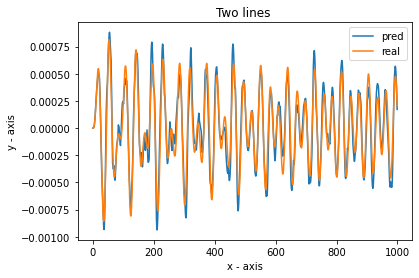

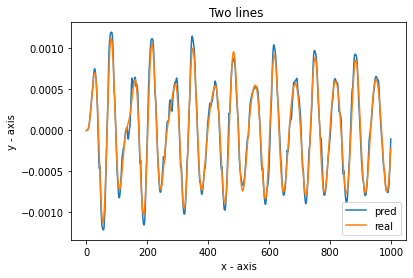

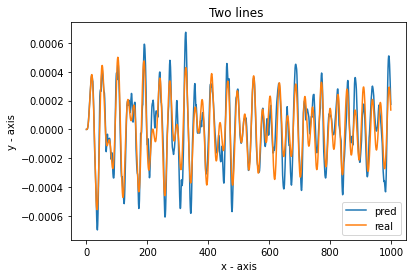

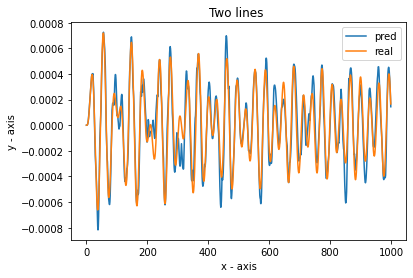

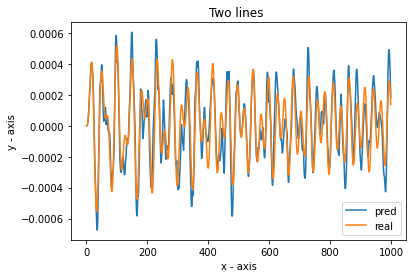

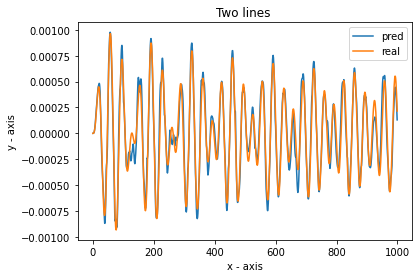

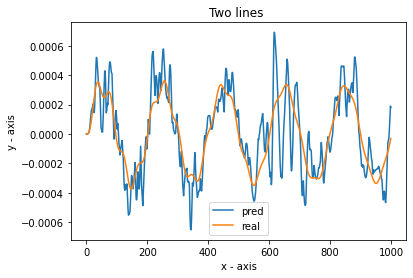

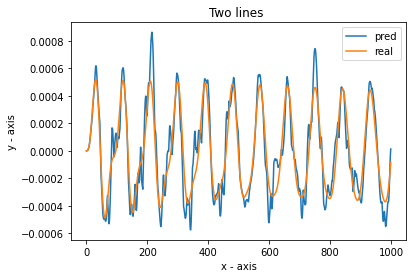

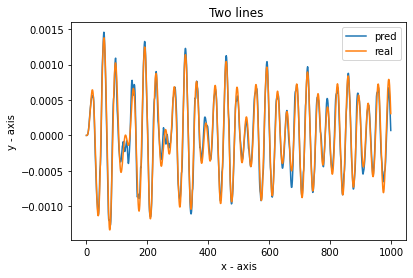

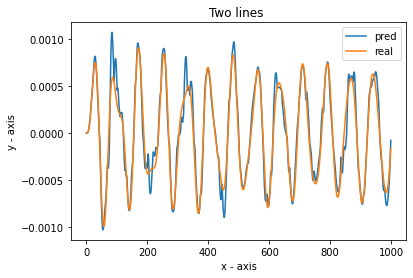

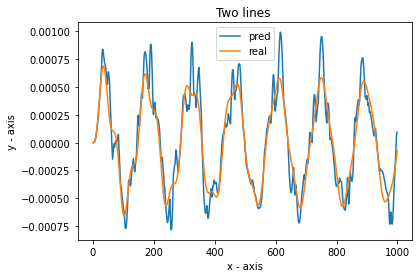

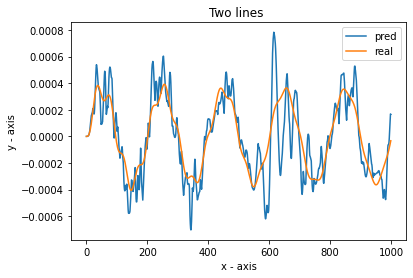

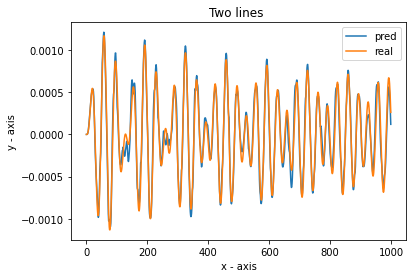

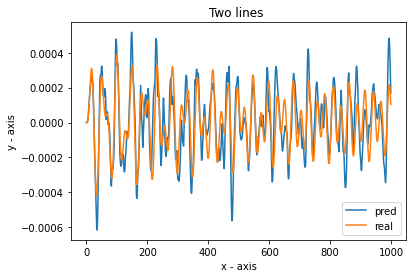

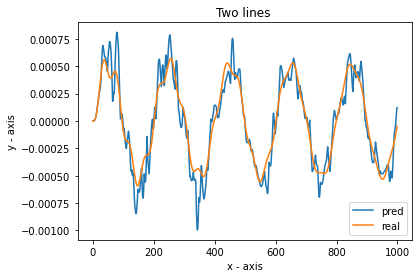

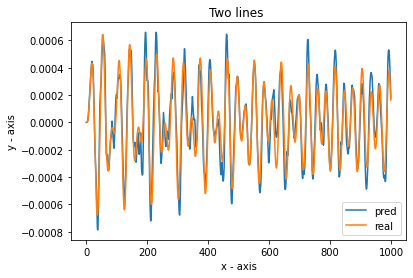

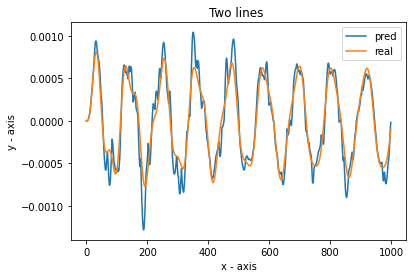

In [28]:
for i in range(36):
    plt.plot(y_pred1[i], label = "pred")

# line 2 points

# plotting the line 2 points

    plt.plot(y_real1[i], label = "real")

# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

In [15]:
for i in range(10):
    y_pred[i][0]=0

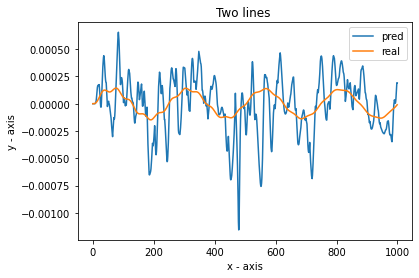

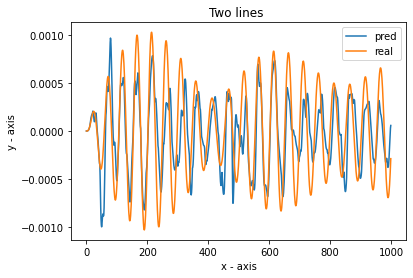

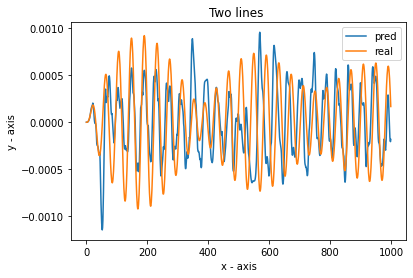

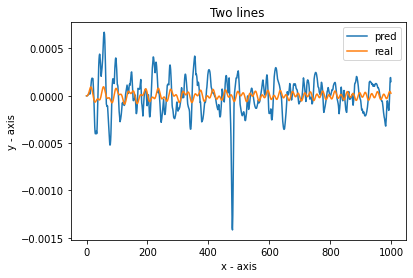

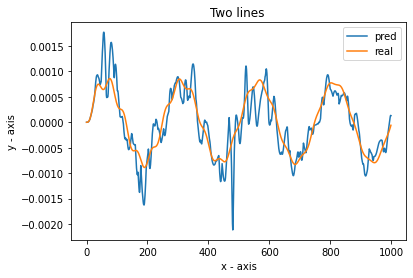

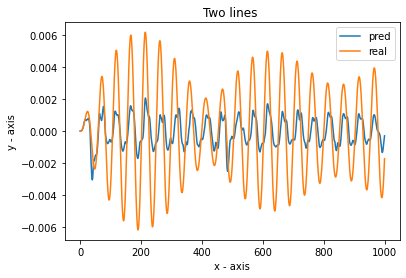

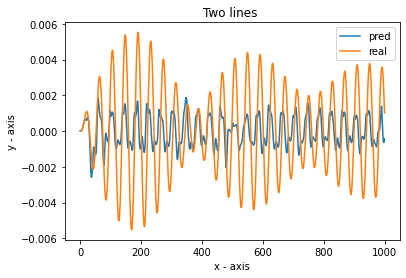

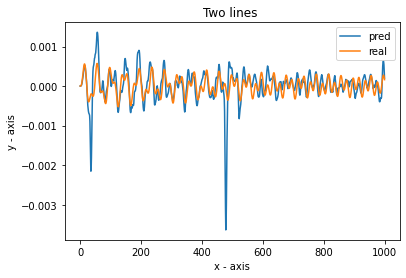

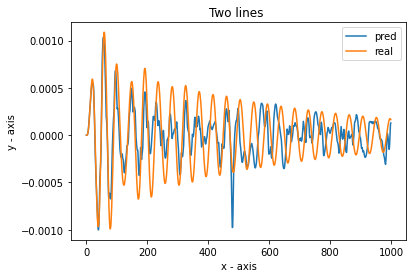

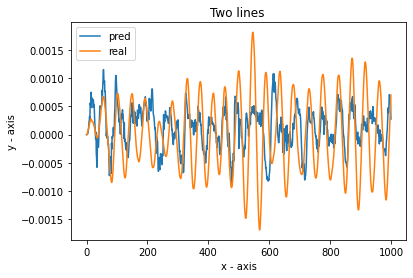

In [16]:
for i in range(10):
    plt.plot(y_pred[i], label = "pred")

# line 2 points

# plotting the line 2 points

    plt.plot(y_real[i], label = "real")

# naming the x axis

    plt.xlabel('x - axis')

# naming the y axis

    plt.ylabel('y - axis')

# giving a title to my graph

    plt.title('Two lines ')

# show a legend on the plot

    plt.legend()

# function to show the plot

    plt.show()

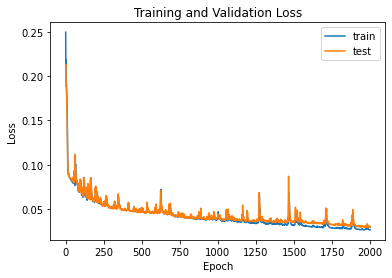

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()